<a href="https://colab.research.google.com/github/akshaya-02ly/akshaya2260-nlp/blob/main/lab_9_3(nlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [3]:


# Gensim is used to load pre-trained Word2Vec embeddings
import gensim
import gensim.downloader as api

# NumPy is used for numerical operations on vectors
import numpy as np

# Scikit-learn is used for similarity calculations and dimensionality reduction
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Matplotlib is used for visualization (scatter plot)
import matplotlib.pyplot as plt


Load Pre-trained Word2Vec Model

In [4]:


# Load Google News Word2Vec model (may take time)
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display example word vector
word = "king"
vector = model[word]

print("\nExample Word:", word)
print("Vector Shape:", vector.shape)
print("First 10 Values of Vector:\n", vector[:10])


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000

Example Word: king
Vector Shape: (300,)
First 10 Values of Vector:
 [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


Compute Word Similarity (10 Word Pairs)

In [5]:


word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("teacher", "student"),
    ("computer", "keyboard"),
    ("sun", "moon"),
    ("india", "china"),
    ("river", "water"),
    ("book", "library")
]

for w1, w2 in word_pairs:
    similarity = model.similarity(w1, w2)
    print(f"Similarity between {w1} and {w2}: {similarity:.4f}")


Similarity between doctor and nurse: 0.6320
Similarity between cat and dog: 0.7609
Similarity between car and bus: 0.4693
Similarity between king and queen: 0.6511
Similarity between teacher and student: 0.6301
Similarity between computer and keyboard: 0.3964
Similarity between sun and moon: 0.4263
Similarity between india and china: 0.3533
Similarity between river and water: 0.5769
Similarity between book and library: 0.3245


Nearest Neighbors (Top Similar Words

In [6]:


words_to_explore = ["king", "university", "computer", "hospital", "music"]

for word in words_to_explore:
    print(f"\nTop 5 similar words to '{word}':")
    similar_words = model.most_similar(word, topn=5)
    for similar_word, score in similar_words:
        print(f"{similar_word} ({score:.4f})")



Top 5 similar words to 'king':
kings (0.7138)
queen (0.6511)
monarch (0.6413)
crown_prince (0.6204)
prince (0.6160)

Top 5 similar words to 'university':
universities (0.7004)
faculty (0.6781)
unversity (0.6758)
undergraduate (0.6587)
univeristy (0.6585)

Top 5 similar words to 'computer':
computers (0.7979)
laptop (0.6640)
laptop_computer (0.6549)
Computer (0.6473)
com_puter (0.6082)

Top 5 similar words to 'hospital':
Hospital (0.7932)
hopsital (0.7784)
hosptial (0.7582)
hospitals (0.7213)
intensive_care (0.7206)

Top 5 similar words to 'music':
classical_music (0.7198)
jazz (0.6835)
Music (0.6596)
Without_Donny_Kirshner (0.6416)
songs (0.6396)


Word Analogy Tasks

In [7]:

analogies = [
    ("king", "man", "woman"),
    ("paris", "france", "india"),
    ("teacher", "school", "hospital")
]

for a, b, c in analogies:
    result = model.most_similar(positive=[a, c], negative=[b], topn=1)
    print(f"\n{a} - {b} + {c} = {result[0][0]} (score: {result[0][1]:.4f})")



king - man + woman = queen (score: 0.7118)

paris - france + india = chennai (score: 0.5443)

teacher - school + hospital = Hospital (score: 0.6331)


Visualization (PCA)

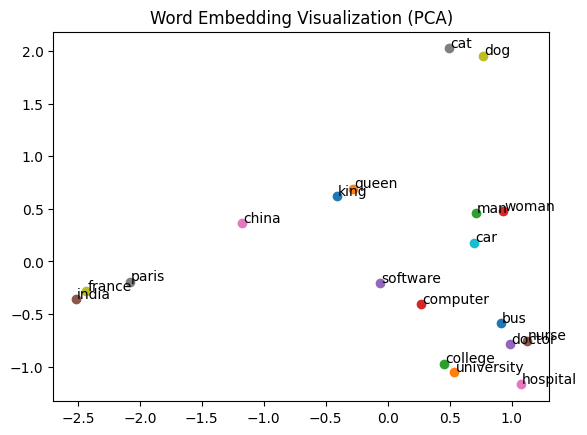

In [8]:

words = [
    "king", "queen", "man", "woman",
    "doctor", "nurse", "hospital",
    "cat", "dog",
    "car", "bus",
    "university", "college",
    "computer", "software",
    "india", "china", "paris", "france"
]

# Get vectors
word_vectors = np.array([model[word] for word in words])

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot
plt.figure()
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word)

plt.title("Word Embedding Visualization (PCA)")
plt.show()
